### Lab1.2. Disease prediction
I det här momentet kommer vi jobba med ett dataset med data för hjärt-kärlsjukdom. Börja med att ladda
ned datasetet från Kaggle och läs på vad de olika features betyder. Notera att detta dataset innehåller
många felaktigheter, exempelvis finns negativa blodtryck och blodtryck som är omöjligt höga.

---
2.0 - EDA uppvärmning
Använd pandas, matplotlib och seaborn för att besvara på följande frågor för datasetet:

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [42]:
df_cardio_train = pd.read_csv("data/cardio_train.csv", sep=";")
df_cardio_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [43]:
df_cardio_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [44]:
df_cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [45]:
cardio_n = pd.DataFrame(df_cardio_train["cardio"].value_counts())

In [46]:
cardio_n

,cardio
0,35021
1,34979


In [47]:
cardio_count = df_cardio_train["cardio"].value_counts().to_frame()

print(f"There are {cardio_n['cardio'].iloc[1]} positive cases for cardiovascular disease")
print(f"There are {cardio_n['cardio'].iloc[0]} negative cases for cardiovascular disease")

There are 34979 positive cases for cardiovascular disease
There are 35021 negative cases for cardiovascular disease


b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

In [48]:
cholesterol_n = pd.DataFrame(df_cardio_train["cholesterol"].value_counts())

In [49]:
cholesterol_sum=pd.DataFrame(cholesterol_n.sum(axis=0))

In [50]:
cholesterol_n['prop_cholesterol'] = cholesterol_n['cholesterol']/cholesterol_sum.iloc[0,0]
cholesterol_n

,cholesterol,prop_cholesterol
1,52385,0.748357
2,9549,0.136414
3,8066,0.115229


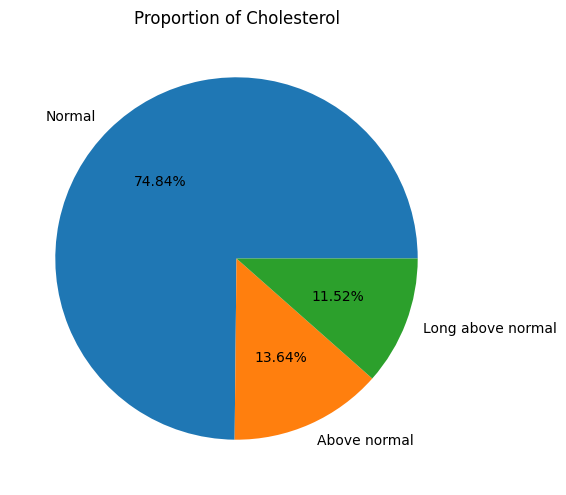

In [51]:
fig, ax = plt.subplots(dpi=100, figsize=(6,6), facecolor="white")
plt.pie(cholesterol_n["cholesterol"], labels=["Normal", "Above normal", "Long above normal"], autopct="%1.2f%%")
ax.set_title("Proportion of Cholesterol");

c) Hur ser åldersfördelningen ut? Rita ett histogram.
Age | Objective Feature | age | int (days)

In [52]:
df_cardio_train['age_in_years'] = df_cardio_train["age"]/365
df_cardio_train['age_in_years'].describe()

count    70000.000000
mean        53.339358
std          6.759594
min         29.583562
25%         48.394521
50%         53.980822
75%         58.430137
max         64.967123
Name: age_in_years, dtype: float64

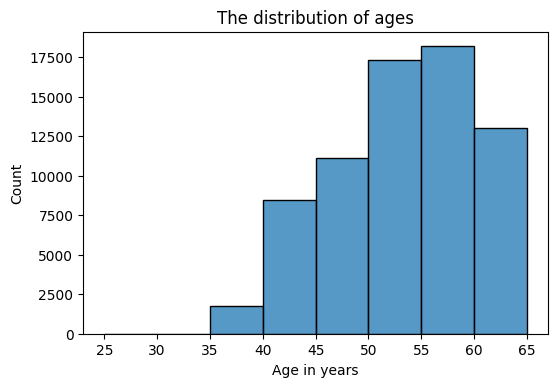

In [53]:
fig = plt.figure(dpi=100)
ax = sns.histplot(df_cardio_train['age_in_years'], bins=range(25, 70, 5))
ax.set(title="The distribution of ages", xlabel="Age in years");

d) Hur stor andel röker?


In [54]:
print(f"There are {df_cardio_train['smoke'].sum()/len(df_cardio_train)*100:.2f}% of the person in the dataset smoke.")

There are 8.81% of the person in the dataset smoke.


e) Hur ser viktfördelningen ut? Rita lämpligt diagram

In [55]:
df_cardio_train["weight"].describe().T

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

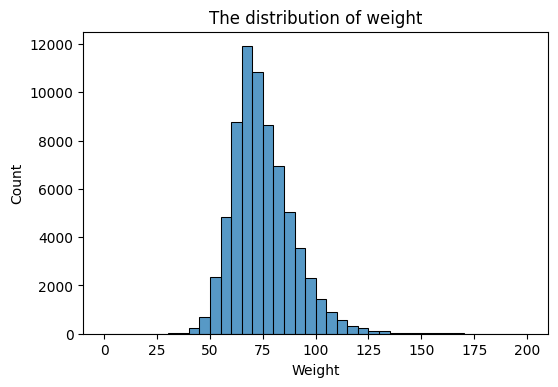

In [56]:
fig, ax = plt.subplots(dpi=100)
sns.histplot(df_cardio_train["weight"], bins=range(0, 205, 5))
ax.set(title="The distribution of weight", xlabel="Weight");

f) Hur ser längdfördelningen ut? Rita lämpligt diagram

In [57]:
df_cardio_train["height"].describe().T

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

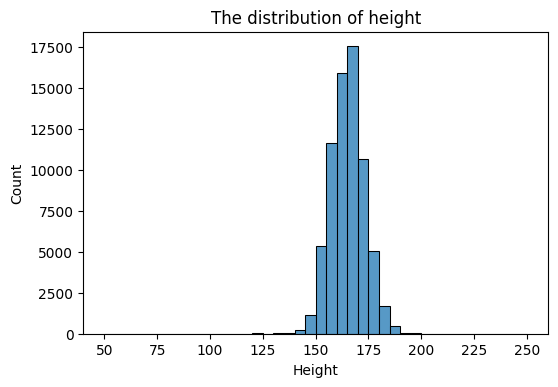

In [58]:
fig, ax = plt.subplots(dpi=100)
sns.histplot(df_cardio_train["height"], bins=range(50, 255, 5))
ax.set(title="The distribution of height", xlabel="Height");

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

In [59]:
df_cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [60]:
df_cardio_train[['height', 'gender']].groupby('gender').agg(np.mean)

,height
gender,
1,161.355612
2,169.947895


The data source does not tell which dummy value of gender stands for male, and which is female. To get an hint, I calculated the average height among gender 1 and 2. 

The result shows that gender 2 has a higher height compre to gender 1. 

It is thereby assumed in my answer that gender=1 when gender == female. And gender 2 stands for male.

In [61]:
cardio_gender = df_cardio_train[['gender', 'cardio']].groupby('gender').sum()
cardio_gender['n_person']=df_cardio_train[['gender', 'cardio']].groupby('gender').count()
cardio_gender['cardio_%']=(cardio_gender['cardio']/cardio_gender['n_person']*100).round(2)
cardio_gender

,cardio,n_person,cardio_%
gender,,,
1,22616,45530,49.67
2,12363,24470,50.52


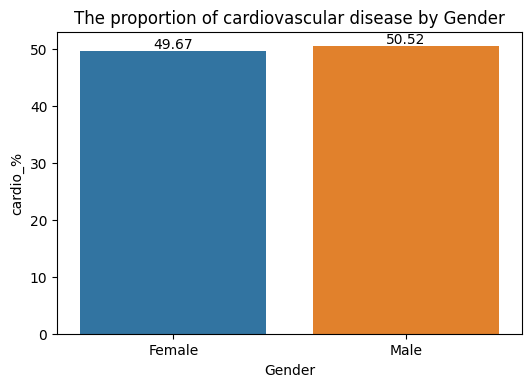

In [75]:
fig, ax = plt.subplots(1,1, dpi=100)
sns.barplot(data=cardio_gender, x=['Female', 'Male'], y='cardio_%')
ax.set(xlabel="Gender", title="The proportion of cardiovascular disease by Gender")
ax.bar_label(ax.containers[0]);
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html

### 2.1.0 - Feature engineering BMI

Skapa en feature för BMI (Body Mass Index), läs på om formeln på wikipedia.

a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket
range av BMIer som vi ska spara. Beskriv hur du gör avvägningen.

In [77]:
df_cardio_train["BMI"] = df_cardio_train["weight"] / ((df_cardio_train["height"]/100)**2)
df_cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177


b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese
(class II), obese (class III).